## Import packages

In [1]:
import pyomo
import pyomo.opt
import pyomo.environ as pyo
import numpy as np
import pandas as pd
import matplotlib as plt

In [2]:
n_evs = 10
n_time = 24

In [3]:
def _auxDictionary(a):
    temp_dictionary = {}
    if len(a.shape) == 3:
        for dim0 in np.arange(a.shape[0]):
            for dim1 in np.arange(a.shape[1]):
                for dim2 in np.arange(a.shape[2]):
                    temp_dictionary[(dim0+1, dim1+1, dim2+1)] = a[dim0, dim1, dim2]
    elif len(a.shape) == 2:
        for dim0 in np.arange(a.shape[0]):
            for dim1 in np.arange(a.shape[1]):
                temp_dictionary[(dim0+1, dim1+1)] = a[dim0, dim1]
    else:
        for dim0 in np.arange(a.shape[0]):
            temp_dictionary[(dim0+1)] = a[dim0]
    return temp_dictionary
#temp_dict1 = _auxDictionary(loadLimit)

## Data

In [4]:
data = {}
data['Inputs'] = pd.read_csv('Inputs.csv')
data['EVs_Inputs'] = pd.read_csv('EVs_Inputs.csv')
data['alpha'] = pd.read_csv('alpha.csv')
data['PchmaxEV'] = pd.read_csv('PchmaxEV.csv')
data['S'] = pd.read_csv('S.csv')

In [5]:
data['EVs_Inputs']

,Esoc,EEVmin,EEVmax,Etrip
0,38.00,1.5,95.0,13.267
1,29.60,1.5,74.0,11.350
2,28.08,1.5,70.2,11.650
3,23.60,1.5,59.0,11.440
4,23.20,1.5,58.0,9.440
5,20.80,1.5,52.0,9.850
6,34.00,1.5,85.0,13.140
7,23.20,1.5,58.0,9.440
8,23.20,1.5,58.0,7.190
9,22.00,1.5,55.0,8.340


In [6]:
data['EVs_Inputs'].to_numpy()

array([[38.   ,  1.5  , 95.   , 13.267],
       [29.6  ,  1.5  , 74.   , 11.35 ],
       [28.08 ,  1.5  , 70.2  , 11.65 ],
       [23.6  ,  1.5  , 59.   , 11.44 ],
       [23.2  ,  1.5  , 58.   ,  9.44 ],
       [20.8  ,  1.5  , 52.   ,  9.85 ],
       [34.   ,  1.5  , 85.   , 13.14 ],
       [23.2  ,  1.5  , 58.   ,  9.44 ],
       [23.2  ,  1.5  , 58.   ,  7.19 ],
       [22.   ,  1.5  , 55.   ,  8.34 ]])

In [7]:
_auxDictionary(data['EVs_Inputs'].to_numpy())


{(1, 1): 38.0,
 (1, 2): 1.5,
 (1, 3): 95.0,
 (1, 4): 13.267,
 (2, 1): 29.6,
 (2, 2): 1.5,
 (2, 3): 74.0,
 (2, 4): 11.35,
 (3, 1): 28.08,
 (3, 2): 1.5,
 (3, 3): 70.2,
 (3, 4): 11.65,
 (4, 1): 23.6,
 (4, 2): 1.5,
 (4, 3): 59.0,
 (4, 4): 11.44,
 (5, 1): 23.2,
 (5, 2): 1.5,
 (5, 3): 58.0,
 (5, 4): 9.44,
 (6, 1): 20.8,
 (6, 2): 1.5,
 (6, 3): 52.0,
 (6, 4): 9.85,
 (7, 1): 34.0,
 (7, 2): 1.5,
 (7, 3): 85.0,
 (7, 4): 13.14,
 (8, 1): 23.2,
 (8, 2): 1.5,
 (8, 3): 58.0,
 (8, 4): 9.44,
 (9, 1): 23.2,
 (9, 2): 1.5,
 (9, 3): 58.0,
 (9, 4): 7.19,
 (10, 1): 22.0,
 (10, 2): 1.5,
 (10, 3): 55.0,
 (10, 4): 8.34}

In [8]:
_auxDictionary(data['EVs_Inputs'].to_numpy()[:,0])

{1: 38.0,
 2: 29.6,
 3: 28.08,
 4: 23.6,
 5: 23.2,
 6: 20.8,
 7: 34.0,
 8: 23.2,
 9: 23.2,
 10: 22.0}

In [9]:
data['EVs_Inputs'].to_numpy()[:,0]

array([38.  , 29.6 , 28.08, 23.6 , 23.2 , 20.8 , 34.  , 23.2 , 23.2 ,
       22.  ])

In [10]:
_auxDictionary(data['Inputs'].to_numpy()[:,0])

{1: 1.0,
 2: 1.0,
 3: 1.0,
 4: 1.0,
 5: 1.0,
 6: 1.0,
 7: 1.0,
 8: 1.0,
 9: 1.0,
 10: 1.0,
 11: 1.0,
 12: 1.0,
 13: 1.0,
 14: 1.0,
 15: 1.0,
 16: 1.0,
 17: 1.0,
 18: 1.0,
 19: 1.0,
 20: 1.0,
 21: 1.0,
 22: 1.0,
 23: 1.0,
 24: 1.0}

In [11]:
_auxDictionary(data['PchmaxEV'].to_numpy())

{(1, 1): 7.2,
 (1, 2): 7.2,
 (1, 3): 7.2,
 (1, 4): 7.2,
 (1, 5): 7.2,
 (1, 6): 7.2,
 (1, 7): 7.2,
 (1, 8): 7.2,
 (1, 9): 7.2,
 (1, 10): 7.2,
 (1, 11): 7.2,
 (1, 12): 7.2,
 (1, 13): 7.2,
 (1, 14): 7.2,
 (1, 15): 0.0,
 (1, 16): 0.0,
 (1, 17): 0.0,
 (1, 18): 0.0,
 (1, 19): 0.0,
 (1, 20): 0.0,
 (1, 21): 0.0,
 (1, 22): 0.0,
 (1, 23): 0.0,
 (1, 24): 0.0,
 (2, 1): 7.2,
 (2, 2): 7.2,
 (2, 3): 7.2,
 (2, 4): 7.2,
 (2, 5): 7.2,
 (2, 6): 7.2,
 (2, 7): 7.2,
 (2, 8): 7.2,
 (2, 9): 7.2,
 (2, 10): 7.2,
 (2, 11): 7.2,
 (2, 12): 7.2,
 (2, 13): 7.2,
 (2, 14): 7.2,
 (2, 15): 0.0,
 (2, 16): 0.0,
 (2, 17): 0.0,
 (2, 18): 0.0,
 (2, 19): 0.0,
 (2, 20): 0.0,
 (2, 21): 0.0,
 (2, 22): 0.0,
 (2, 23): 0.0,
 (2, 24): 0.0,
 (3, 1): 7.2,
 (3, 2): 7.2,
 (3, 3): 7.2,
 (3, 4): 7.2,
 (3, 5): 7.2,
 (3, 6): 7.2,
 (3, 7): 7.2,
 (3, 8): 7.2,
 (3, 9): 7.2,
 (3, 10): 7.2,
 (3, 11): 7.2,
 (3, 12): 7.2,
 (3, 13): 7.2,
 (3, 14): 7.2,
 (3, 15): 0.0,
 (3, 16): 0.0,
 (3, 17): 0.0,
 (3, 18): 0.0,
 (3, 19): 0.0,
 (3, 20): 0.0,
 (3, 21

In [12]:
_auxDictionary(data['alpha'].to_numpy())

{(1, 1): 1,
 (1, 2): 1,
 (1, 3): 1,
 (1, 4): 1,
 (1, 5): 1,
 (1, 6): 1,
 (1, 7): 1,
 (1, 8): 1,
 (1, 9): 1,
 (1, 10): 1,
 (1, 11): 1,
 (1, 12): 1,
 (1, 13): 1,
 (1, 14): 1,
 (1, 15): 0,
 (1, 16): 0,
 (1, 17): 0,
 (1, 18): 0,
 (1, 19): 0,
 (1, 20): 0,
 (1, 21): 0,
 (1, 22): 0,
 (1, 23): 0,
 (1, 24): 0,
 (2, 1): 1,
 (2, 2): 1,
 (2, 3): 1,
 (2, 4): 1,
 (2, 5): 1,
 (2, 6): 1,
 (2, 7): 1,
 (2, 8): 1,
 (2, 9): 1,
 (2, 10): 1,
 (2, 11): 1,
 (2, 12): 1,
 (2, 13): 1,
 (2, 14): 1,
 (2, 15): 0,
 (2, 16): 0,
 (2, 17): 0,
 (2, 18): 0,
 (2, 19): 0,
 (2, 20): 0,
 (2, 21): 0,
 (2, 22): 0,
 (2, 23): 0,
 (2, 24): 0,
 (3, 1): 1,
 (3, 2): 1,
 (3, 3): 1,
 (3, 4): 1,
 (3, 5): 1,
 (3, 6): 1,
 (3, 7): 1,
 (3, 8): 1,
 (3, 9): 1,
 (3, 10): 1,
 (3, 11): 1,
 (3, 12): 1,
 (3, 13): 1,
 (3, 14): 1,
 (3, 15): 0,
 (3, 16): 0,
 (3, 17): 0,
 (3, 18): 0,
 (3, 19): 0,
 (3, 20): 0,
 (3, 21): 0,
 (3, 22): 0,
 (3, 23): 0,
 (3, 24): 0,
 (4, 1): 1,
 (4, 2): 1,
 (4, 3): 1,
 (4, 4): 1,
 (4, 5): 1,
 (4, 6): 1,
 (4, 7): 1,
 (4, 8)

In [13]:
_auxDictionary(data['S'].to_numpy())

{(1, 1): 0,
 (1, 2): 0,
 (1, 3): 0,
 (1, 4): 0,
 (1, 5): 0,
 (1, 6): 0,
 (1, 7): 0,
 (1, 8): 0,
 (1, 9): 0,
 (1, 10): 0,
 (1, 11): 0,
 (1, 12): 0,
 (1, 13): 1,
 (1, 14): 0,
 (1, 15): 0,
 (1, 16): 1,
 (1, 17): 0,
 (1, 18): 0,
 (1, 19): 0,
 (1, 20): 0,
 (1, 21): 0,
 (1, 22): 0,
 (1, 23): 0,
 (1, 24): 1,
 (2, 1): 0,
 (2, 2): 0,
 (2, 3): 0,
 (2, 4): 0,
 (2, 5): 0,
 (2, 6): 0,
 (2, 7): 0,
 (2, 8): 0,
 (2, 9): 0,
 (2, 10): 0,
 (2, 11): 0,
 (2, 12): 0,
 (2, 13): 1,
 (2, 14): 0,
 (2, 15): 0,
 (2, 16): 1,
 (2, 17): 0,
 (2, 18): 0,
 (2, 19): 0,
 (2, 20): 0,
 (2, 21): 0,
 (2, 22): 0,
 (2, 23): 0,
 (2, 24): 1,
 (3, 1): 0,
 (3, 2): 0,
 (3, 3): 0,
 (3, 4): 0,
 (3, 5): 0,
 (3, 6): 0,
 (3, 7): 0,
 (3, 8): 0,
 (3, 9): 0,
 (3, 10): 0,
 (3, 11): 0,
 (3, 12): 0,
 (3, 13): 1,
 (3, 14): 0,
 (3, 15): 0,
 (3, 16): 1,
 (3, 17): 0,
 (3, 18): 0,
 (3, 19): 0,
 (3, 20): 0,
 (3, 21): 0,
 (3, 22): 0,
 (3, 23): 0,
 (3, 24): 1,
 (4, 1): 0,
 (4, 2): 0,
 (4, 3): 0,
 (4, 4): 0,
 (4, 5): 0,
 (4, 6): 0,
 (4, 7): 0,
 (4, 8)

## Sets

In [14]:
model = pyo.ConcreteModel()

model.ev = pyo.Set(initialize = np.arange(1, n_evs + 1))
model.t = pyo.Set(initialize = np.arange(1, n_time + 1))


## Parameters

In [15]:
model.EEVmax = pyo.Param(model.ev, initialize =_auxDictionary(data['EVs_Inputs'].to_numpy()[:,2]))
model.EEVmin = pyo.Param(model.ev, initialize =_auxDictionary(data['EVs_Inputs'].to_numpy()[:,1]))
model.ESoc = pyo.Param(model.ev, initialize =_auxDictionary(data['EVs_Inputs'].to_numpy()[:,0]))
model.dT = pyo.Param(model.t, initialize =_auxDictionary(data['Inputs'].to_numpy()[:,0]))
model.cDA = pyo.Param(model.t, initialize =_auxDictionary(data['Inputs'].to_numpy()[:,1]))
model.PchmaxEV = pyo.Param(model.ev, model.t, initialize =_auxDictionary(data['PchmaxEV'].to_numpy()))
model.S = pyo.Param(model.ev, model.t, initialize = _auxDictionary(data['S'].to_numpy()))
model.alpha = pyo.Param(model.ev, model.t, initialize = _auxDictionary(data['alpha'].to_numpy()))
model.RealHour = pyo.Param(model.t, initialize=_auxDictionary(data['Inputs'].to_numpy()[:,2]))
model.penalty1 = 1000
model.penalty2 = 1000
model.penalty3 = 0.6
model.Etrip = pyo.Param(model.ev, initialize=_auxDictionary(data['EVs_Inputs'].to_numpy()[:,3]))
model.n = 0.95
model.m = 0.6

## Variables

In [16]:
model.PEV = pyo.Var(model.ev, model.t, domain = pyo.NonNegativeReals, initialize = 0)
model.EEV = pyo.Var(model.ev, model.t, domain = pyo.Reals, initialize = 0)
model.Etriprelax = pyo.Var(model.ev, model.t, domain = pyo.NonNegativeReals, initialize = 0)
model.Eminsocrelax = pyo.Var(model.ev, model.t, domain = pyo.NonNegativeReals, initialize = 0)
model.Etripn = pyo.Var(model.ev, model.t, domain = pyo.Reals, initialize = 0)

## Constraints

In [17]:
def _balance_etripn(m,ev,t): 
    return m.Etripn[ev,t] == m.Etrip[ev]*m.S[ev,t]/(sum([m.S[ev,k] for k in np.arange(1, n_time + 1)]))
model.balance_etripn = pyo.Constraint(model.ev, model.t, rule = _balance_etripn)

def _balance_energy_EVS3(m,ev,t): 
    if t == 24:
        return m.EEV[ev,t] + m.Etriprelax[ev,t] == m.EEVmax[ev]*m.m
    return pyo.Constraint.Skip
model.balance_energy_EVS3 = pyo.Constraint(model.ev, model.t, rule = _balance_energy_EVS3)

def _balance_energy_EVS(m,ev,t): 
    if t == 1:
        return m.EEV[ev,t] - m.Etriprelax[ev,t] == m.ESoc[ev] + m.PEV[ev,t]*m.dT[t]*m.n - m.Etripn[ev,t]
    return pyo.Constraint.Skip
model.balance_energy_EVS = pyo.Constraint(model.ev, model.t, rule = _balance_energy_EVS)

def _balance_energy_EVS2(m,ev,t): 
    if t > 1:
        return m.EEV[ev,t] - m.Etriprelax[ev,t] == m.EEV[ev,t-1] + m.PEV[ev,t]*m.dT[t]*m.n - m.Etripn[ev,t]
    return pyo.Constraint.Skip
model.balance_energy_EVS2 = pyo.Constraint(model.ev, model.t, rule = _balance_energy_EVS2)

def _power_charging_limit1(m,ev,t): 
    return m.PEV[ev,t] >= 0
model.power_charging_limit1 = pyo.Constraint(model.ev, model.t, rule = _power_charging_limit1)

def _power_charging_limit2(m,ev,t): 
    return m.PEV[ev,t] <= m.alpha[ev,t]*m.PchmaxEV[ev,t]
model.power_charging_limit2 = pyo.Constraint(model.ev, model.t, rule = _power_charging_limit2)

def _energy_limits_EVS_1(m,ev,t): 
    return m.EEVmin[ev] <= m.EEV[ev,t] + m.Eminsocrelax[ev,t]
    #return m.EEVmin[ev] <= m.EEV[ev,t]
model.energy_limits_EVS_1 = pyo.Constraint(model.ev, model.t, rule = _energy_limits_EVS_1)

def _energy_limits_EVS_2(m,ev,t): 
    return m.EEV[ev,t] <= m.EEVmax[ev]
model.energy_limits_EVS_2 = pyo.Constraint(model.ev, model.t, rule = _energy_limits_EVS_2)  

## Objective function

In [18]:
def _FOag(m):
    return sum([m.PEV[ev,t]*m.dT[t]*m.cDA[t] + m.Etriprelax[ev,t]*m.penalty1 + m.Eminsocrelax[ev,t]*m.penalty2 for ev in np.arange(1, n_evs + 1) for t in np.arange(1, n_time + 1)])

model.FOag = pyo.Objective(rule = _FOag, sense = pyo.minimize)

## Solve the model

In [19]:
from pyomo.opt import SolverFactory

model.write('res_V4_EC.lp',  io_options={'symbolic_solver_labels': True})

# Create a solver
#opt = pyo.SolverFactory('cbc', executable='C:/Program Files/Cbc-releases.2.10.8-x86_64-w64-mingw64/bin/cbc.exe')

#opt = pyo.SolverFactory('cplex', executable='C:/Program Files/IBM/ILOG/CPLEX_Studio_Community221/cplex/bin/x64_win64/cplex.exe')
#opt.options['LogFile'] = 'res_V4_EC.log'

opt = pyo.SolverFactory('ipopt', executable='C:/Program Files/Ipopt-3.11.1-win64-intel13.1/bin/ipopt.exe')
opt.options['print_level'] = 12
opt.options['output_file'] = "res_V5_EC.log"

results = opt.solve(model)#, tee=True)
results.write()

# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 1450
  Number of variables: 1200
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: Ipopt 3.11.1\x3a Optimal Solution Found
  Termination condition: optimal
  Id: 0
  Error rc: 0
  Time: 32.45358967781067
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


## Objective Function Value

In [82]:
pyo.value(model.FOag)

5.590718244997832

## Results

In [20]:
def ext_pyomo_vals(vals):
    # make a pd.Series from each
    s = pd.Series(vals.extract_values(),
                  index=vals.extract_values().keys())
    # if the series is multi-indexed we need to unstack it...
    if type(s.index[0]) == tuple:    # it is multi-indexed
        s = s.unstack(level=1)
    else:
        # force transition from Series -> df
        s = pd.DataFrame(s)
    return s

In [21]:
ext_pyomo_vals(model.EEV).iloc[0]

1     38.000001
2     38.000002
3     38.000003
4     38.000004
5     38.000005
6     38.000008
7     42.906975
8     42.906977
9     42.906982
10    42.907061
11    49.747051
12    56.587048
13    59.004712
14    65.844667
15    65.844667
16    61.422333
17    61.422333
18    61.422333
19    61.422333
20    61.422333
21    61.422333
22    61.422333
23    61.422333
24    57.000000
Name: 1, dtype: float64

In [22]:
ext_pyomo_vals(model.PEV)

,1,2,3,4,5,6,7,8,9,10,...,15,16,17,18,19,20,21,22,23,24
1,1.262037e-06,9.045650e-07,8.631387e-07,1.131646e-06,1.627860e-06,2.805697e-06,5.165228e+00,2.774424e-06,4.630913e-06,8.351982e-05,...,3.263690e-09,3.266577e-09,3.273069e-09,3.287247e-09,3.307389e-09,3.324642e-09,3.334536e-09,3.339267e-09,3.340370e-09,3.340680e-09
2,1.245963e-06,8.962354e-07,8.555430e-07,1.118677e-06,1.601234e-06,2.727508e-06,1.002031e-04,2.697886e-06,4.420593e-06,4.519308e-05,...,3.253408e-09,3.258886e-09,3.262168e-09,3.270200e-09,3.284403e-09,3.308807e-09,3.329750e-09,3.335652e-09,3.336698e-09,3.337062e-09
3,1.245989e-06,8.962471e-07,8.555538e-07,1.118699e-06,1.601291e-06,2.727745e-06,1.006142e-04,2.698135e-06,4.421530e-06,4.491455e-05,...,3.244441e-09,3.249759e-09,3.252294e-09,3.253510e-09,3.277653e-09,3.310391e-09,3.328077e-09,3.335796e-09,3.337553e-09,3.337997e-09
4,1.246052e-06,8.962764e-07,8.555813e-07,1.118755e-06,1.601439e-06,2.728388e-06,9.798024e-05,2.698820e-06,4.424268e-06,4.515388e-05,...,3.275593e-09,3.288429e-09,3.280720e-09,3.276812e-09,3.285227e-09,3.314728e-09,3.331311e-09,3.336362e-09,3.337592e-09,3.337889e-09
5,3.391360e-09,3.395754e-09,3.400550e-09,3.405825e-09,3.410880e-09,3.415287e-09,3.418629e-09,3.419151e-09,3.418692e-09,3.416948e-09,...,3.380398e-09,1.397792e-06,1.536833e-06,2.508445e-06,4.903373e-06,2.087133e-05,2.509162e-04,2.199999e+01,1.470925e-01,3.323613e-09
6,3.390439e-09,3.394841e-09,3.399644e-09,3.404935e-09,3.410044e-09,3.414605e-09,3.418352e-09,3.419852e-09,3.420778e-09,3.420205e-09,...,3.385515e-09,1.255577e-06,1.366828e-06,2.086886e-06,3.519124e-06,7.819544e-06,1.191954e-05,2.131575e+01,1.251606e-05,3.323214e-09
7,3.394087e-09,3.398567e-09,3.403514e-09,3.408822e-09,3.413834e-09,3.418000e-09,3.420929e-09,3.420686e-09,3.418433e-09,3.413716e-09,...,3.368287e-09,1.397805e-06,1.536846e-06,2.508471e-06,4.903407e-06,2.086712e-05,2.501502e-04,2.199999e+01,9.726041e+00,3.322884e-09
8,3.391360e-09,3.395754e-09,3.400550e-09,3.405825e-09,3.410880e-09,3.415287e-09,3.418629e-09,3.419151e-09,3.418692e-09,3.416948e-09,...,3.380398e-09,1.397792e-06,1.536833e-06,2.508445e-06,4.903373e-06,2.087133e-05,2.509162e-04,2.199999e+01,1.470925e-01,3.323613e-09
9,3.388752e-09,3.392851e-09,3.397394e-09,3.402501e-09,3.407561e-09,3.412306e-09,3.416618e-09,3.419130e-09,3.421262e-09,3.421972e-09,...,3.393087e-09,1.255581e-06,1.366836e-06,2.086908e-06,3.519205e-06,7.819991e-06,1.192067e-05,1.977890e+01,1.251660e-05,2.627654e-06
10,3.391654e-09,3.395880e-09,3.400623e-09,3.405976e-09,3.411327e-09,3.416467e-09,3.421353e-09,3.424440e-09,3.426888e-09,3.427741e-09,...,3.396014e-09,1.255582e-06,1.366835e-06,2.086906e-06,3.519202e-06,7.820042e-06,1.192065e-05,2.035785e+01,1.251626e-05,2.627634e-06


In [23]:
ext_pyomo_vals(model.PEV).sum().sum()

250.4705289407737

In [24]:
ext_pyomo_vals(model.PEV).iloc[0]

1     1.262037e-06
2     9.045650e-07
3     8.631387e-07
4     1.131646e-06
5     1.627860e-06
6     2.805697e-06
7     5.165228e+00
8     2.774424e-06
9     4.630913e-06
10    8.351982e-05
11    7.199989e+00
12    7.199997e+00
13    7.199997e+00
14    7.199953e+00
15    3.263690e-09
16    3.266577e-09
17    3.273069e-09
18    3.287247e-09
19    3.307389e-09
20    3.324642e-09
21    3.334536e-09
22    3.339267e-09
23    3.340370e-09
24    3.340680e-09
Name: 1, dtype: float64

In [25]:
ext_pyomo_vals(model.EEV)

,1,2,3,4,5,6,7,8,9,10,...,15,16,17,18,19,20,21,22,23,24
1,38.000001,38.000002,38.000003,38.000004,38.000005,38.000008,42.906975,42.906977,42.906982,42.907061,...,65.844667,61.422333,61.422333,61.422333,61.422333,61.422333,61.422333,61.422333,61.422333,57.00
2,29.600001,29.600002,29.600003,29.600004,29.600005,29.600008,29.600103,29.600106,29.600110,29.600153,...,51.966667,48.183333,48.183333,48.183333,48.183333,48.183333,48.183333,48.183333,48.183333,44.40
3,28.080001,28.080002,28.080003,28.080004,28.080005,28.080008,28.080104,28.080106,28.080110,28.080153,...,49.886667,46.003333,46.003333,46.003333,46.003333,46.003333,46.003333,46.003333,46.003333,42.12
4,23.600001,23.600002,23.600003,23.600004,23.600005,23.600008,23.600101,23.600104,23.600108,23.600151,...,43.026667,39.213333,39.213333,39.213333,39.213333,39.213333,39.213333,39.213333,39.213333,35.40
5,23.200000,23.200000,23.200000,23.200000,23.200000,23.200000,23.200000,23.200000,23.200000,23.200000,...,18.480000,18.480001,18.480003,18.480005,18.480010,18.480030,18.480268,39.380262,39.520000,34.80
6,20.800000,20.800000,20.800000,20.800000,20.800000,20.800000,20.800000,20.800000,20.800000,20.800000,...,15.875000,15.875001,15.875002,15.875004,15.875008,15.875015,15.875026,36.124988,36.125000,31.20
7,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,...,27.430000,27.430001,27.430003,27.430005,27.430010,27.430030,27.430267,48.330261,57.570000,51.00
8,23.200000,23.200000,23.200000,23.200000,23.200000,23.200000,23.200000,23.200000,23.200000,23.200000,...,18.480000,18.480001,18.480003,18.480005,18.480010,18.480030,18.480268,39.380262,39.520000,34.80
9,19.605000,19.605000,19.605000,19.605000,19.605000,19.605000,19.605000,19.605000,19.605000,19.605000,...,16.010000,16.010001,16.010002,16.010004,16.010008,16.010015,16.010026,34.799986,34.799998,34.80
10,17.830000,17.830000,17.830000,17.830000,17.830000,17.830000,17.830000,17.830000,17.830000,17.830000,...,13.660000,13.660001,13.660002,13.660004,13.660008,13.660015,13.660026,32.999986,32.999998,33.00


In [26]:
ext_pyomo_vals(model.PEV)

,1,2,3,4,5,6,7,8,9,10,...,15,16,17,18,19,20,21,22,23,24
1,1.262037e-06,9.045650e-07,8.631387e-07,1.131646e-06,1.627860e-06,2.805697e-06,5.165228e+00,2.774424e-06,4.630913e-06,8.351982e-05,...,3.263690e-09,3.266577e-09,3.273069e-09,3.287247e-09,3.307389e-09,3.324642e-09,3.334536e-09,3.339267e-09,3.340370e-09,3.340680e-09
2,1.245963e-06,8.962354e-07,8.555430e-07,1.118677e-06,1.601234e-06,2.727508e-06,1.002031e-04,2.697886e-06,4.420593e-06,4.519308e-05,...,3.253408e-09,3.258886e-09,3.262168e-09,3.270200e-09,3.284403e-09,3.308807e-09,3.329750e-09,3.335652e-09,3.336698e-09,3.337062e-09
3,1.245989e-06,8.962471e-07,8.555538e-07,1.118699e-06,1.601291e-06,2.727745e-06,1.006142e-04,2.698135e-06,4.421530e-06,4.491455e-05,...,3.244441e-09,3.249759e-09,3.252294e-09,3.253510e-09,3.277653e-09,3.310391e-09,3.328077e-09,3.335796e-09,3.337553e-09,3.337997e-09
4,1.246052e-06,8.962764e-07,8.555813e-07,1.118755e-06,1.601439e-06,2.728388e-06,9.798024e-05,2.698820e-06,4.424268e-06,4.515388e-05,...,3.275593e-09,3.288429e-09,3.280720e-09,3.276812e-09,3.285227e-09,3.314728e-09,3.331311e-09,3.336362e-09,3.337592e-09,3.337889e-09
5,3.391360e-09,3.395754e-09,3.400550e-09,3.405825e-09,3.410880e-09,3.415287e-09,3.418629e-09,3.419151e-09,3.418692e-09,3.416948e-09,...,3.380398e-09,1.397792e-06,1.536833e-06,2.508445e-06,4.903373e-06,2.087133e-05,2.509162e-04,2.199999e+01,1.470925e-01,3.323613e-09
6,3.390439e-09,3.394841e-09,3.399644e-09,3.404935e-09,3.410044e-09,3.414605e-09,3.418352e-09,3.419852e-09,3.420778e-09,3.420205e-09,...,3.385515e-09,1.255577e-06,1.366828e-06,2.086886e-06,3.519124e-06,7.819544e-06,1.191954e-05,2.131575e+01,1.251606e-05,3.323214e-09
7,3.394087e-09,3.398567e-09,3.403514e-09,3.408822e-09,3.413834e-09,3.418000e-09,3.420929e-09,3.420686e-09,3.418433e-09,3.413716e-09,...,3.368287e-09,1.397805e-06,1.536846e-06,2.508471e-06,4.903407e-06,2.086712e-05,2.501502e-04,2.199999e+01,9.726041e+00,3.322884e-09
8,3.391360e-09,3.395754e-09,3.400550e-09,3.405825e-09,3.410880e-09,3.415287e-09,3.418629e-09,3.419151e-09,3.418692e-09,3.416948e-09,...,3.380398e-09,1.397792e-06,1.536833e-06,2.508445e-06,4.903373e-06,2.087133e-05,2.509162e-04,2.199999e+01,1.470925e-01,3.323613e-09
9,3.388752e-09,3.392851e-09,3.397394e-09,3.402501e-09,3.407561e-09,3.412306e-09,3.416618e-09,3.419130e-09,3.421262e-09,3.421972e-09,...,3.393087e-09,1.255581e-06,1.366836e-06,2.086908e-06,3.519205e-06,7.819991e-06,1.192067e-05,1.977890e+01,1.251660e-05,2.627654e-06
10,3.391654e-09,3.395880e-09,3.400623e-09,3.405976e-09,3.411327e-09,3.416467e-09,3.421353e-09,3.424440e-09,3.426888e-09,3.427741e-09,...,3.396014e-09,1.255582e-06,1.366835e-06,2.086906e-06,3.519202e-06,7.820042e-06,1.192065e-05,2.035785e+01,1.251626e-05,2.627634e-06


In [27]:
ext_pyomo_vals(model.Etripn)

,1,2,3,4,5,6,7,8,9,10,...,15,16,17,18,19,20,21,22,23,24
1,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4.422333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.422333
2,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,3.783333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.783333
3,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,3.883333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.883333
4,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,3.813333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.813333
5,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.720000
6,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.925000
7,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.570000
8,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.720000
9,3.595,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
10,4.170,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


In [28]:
ext_pyomo_vals(model.Etriprelax)

,1,2,3,4,5,6,7,8,9,10,...,15,16,17,18,19,20,21,22,23,24
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [29]:
ext_pyomo_vals(model.EEVmax)

,0
1,95.0
2,74.0
3,70.2
4,59.0
5,58.0
6,52.0
7,85.0
8,58.0
9,58.0
10,55.0


In [30]:
ext_pyomo_vals(model.EEV)[24][1] == ext_pyomo_vals(model.EEVmax)[0][1]*model.m

False

In [31]:
ext_pyomo_vals(model.EEV)

,1,2,3,4,5,6,7,8,9,10,...,15,16,17,18,19,20,21,22,23,24
1,38.000001,38.000002,38.000003,38.000004,38.000005,38.000008,42.906975,42.906977,42.906982,42.907061,...,65.844667,61.422333,61.422333,61.422333,61.422333,61.422333,61.422333,61.422333,61.422333,57.00
2,29.600001,29.600002,29.600003,29.600004,29.600005,29.600008,29.600103,29.600106,29.600110,29.600153,...,51.966667,48.183333,48.183333,48.183333,48.183333,48.183333,48.183333,48.183333,48.183333,44.40
3,28.080001,28.080002,28.080003,28.080004,28.080005,28.080008,28.080104,28.080106,28.080110,28.080153,...,49.886667,46.003333,46.003333,46.003333,46.003333,46.003333,46.003333,46.003333,46.003333,42.12
4,23.600001,23.600002,23.600003,23.600004,23.600005,23.600008,23.600101,23.600104,23.600108,23.600151,...,43.026667,39.213333,39.213333,39.213333,39.213333,39.213333,39.213333,39.213333,39.213333,35.40
5,23.200000,23.200000,23.200000,23.200000,23.200000,23.200000,23.200000,23.200000,23.200000,23.200000,...,18.480000,18.480001,18.480003,18.480005,18.480010,18.480030,18.480268,39.380262,39.520000,34.80
6,20.800000,20.800000,20.800000,20.800000,20.800000,20.800000,20.800000,20.800000,20.800000,20.800000,...,15.875000,15.875001,15.875002,15.875004,15.875008,15.875015,15.875026,36.124988,36.125000,31.20
7,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,...,27.430000,27.430001,27.430003,27.430005,27.430010,27.430030,27.430267,48.330261,57.570000,51.00
8,23.200000,23.200000,23.200000,23.200000,23.200000,23.200000,23.200000,23.200000,23.200000,23.200000,...,18.480000,18.480001,18.480003,18.480005,18.480010,18.480030,18.480268,39.380262,39.520000,34.80
9,19.605000,19.605000,19.605000,19.605000,19.605000,19.605000,19.605000,19.605000,19.605000,19.605000,...,16.010000,16.010001,16.010002,16.010004,16.010008,16.010015,16.010026,34.799986,34.799998,34.80
10,17.830000,17.830000,17.830000,17.830000,17.830000,17.830000,17.830000,17.830000,17.830000,17.830000,...,13.660000,13.660001,13.660002,13.660004,13.660008,13.660015,13.660026,32.999986,32.999998,33.00


In [32]:
sum([model.S[5,k] for k in np.arange(1, n_time + 1)])

2

In [33]:
ext_pyomo_vals(model.S).iloc[5]

1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    1
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    1
Name: 6, dtype: int64

In [34]:
ext_pyomo_vals(model.Etripn)[1][1]

0.0

In [35]:
ext_pyomo_vals(model.Etrip)[0][1]

13.267

In [36]:
ext_pyomo_vals(model.S)[1][1]

0

In [37]:
ext_pyomo_vals(model.Etripn)[1][2]

0.0

In [83]:
ext_pyomo_vals(model.PEV).round().sum()

1       0.0
2       0.0
3       0.0
4       0.0
5       0.0
6       0.0
7       5.0
8       0.0
9       0.0
10      0.0
11     28.0
12     28.0
13     28.0
14     21.0
15      0.0
16      0.0
17      0.0
18      0.0
19      0.0
20      0.0
21      0.0
22    127.0
23     10.0
24      0.0
dtype: float64

In [39]:
ext_pyomo_vals(model.PEV).sum().sum()

250.4705289407737

In [54]:
ext_pyomo_vals(model.PEV).sum()

1     5.020389e-06
2     3.613697e-06
3     3.450219e-06
4     4.508212e-06
5     6.452290e-06
6     1.100983e-05
7     5.165527e+00
8     1.088979e-05
9     1.791783e-05
10    2.188018e-04
11    2.879995e+01
12    2.879999e+01
13    2.879999e+01
14    2.143111e+01
15    3.334083e-08
16    7.973193e-06
17    8.724078e-06
18    1.379915e-05
19    2.528084e-05
20    8.608261e-05
21    7.877569e-04
22    1.274525e+02
23    1.002026e+01
24    5.281935e-06
dtype: float64

In [78]:
ext_pyomo_vals(model.PEV).sum()[7:24].append(ext_pyomo_vals(model.PEV).sum()[0:7]).index

Int64Index([ 8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24,
             1,  2,  3,  4,  5,  6,  7],
           dtype='int64')

<AxesSubplot:>

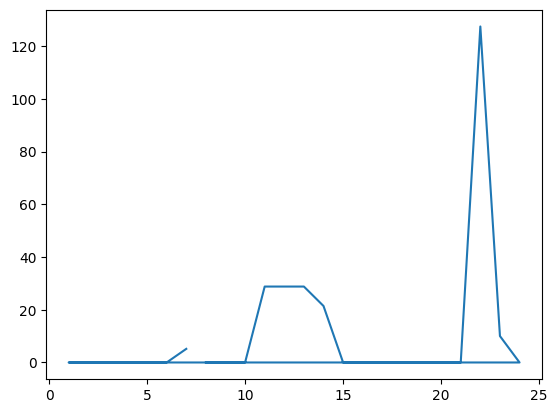

In [80]:
ext_pyomo_vals(model.PEV).sum()[7:24].append(ext_pyomo_vals(model.PEV).sum()[0:7]).plot()